In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [128]:
df = pd.read_csv('Delhi data set.csv')

In [129]:
df.head(10)

,Unnamed: 0,Borough,Latitude,Longitude,Population,City,Neighbourhood
0,0,North west,28.696400,77.127100,3656539,Delhi,Najafgarh
1,1,South West,28.609550,77.139670,2292958,Delhi,Parliament Street
2,2,South Delhi,28.554900,77.191900,2731929,Delhi,Connaught Place
3,3,West Delhi,28.660800,77.100800,2543243,Delhi,Vivek vihar
4,4,East Delhi,28.718400,77.172400,1709346,Delhi,Karol bagh
5,5,North east,28.693600,77.258000,2241624,Delhi,Vasant Vihar
6,6,North Delhi,28.676314,77.224977,887978,Delhi,Defence Colony
7,7,New Delhi,28.365000,77.123200,257803,Delhi,Gandhi Nagar
8,8,Central,28.384200,77.144200,582320,Delhi,Preet Vihar


In [130]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [131]:
delhi_population = pd.DataFrame(df[['Borough','Neighbourhood','Population']])


In [132]:
delhi_population.head()

,Borough,Neighbourhood,Population
0,North west,Najafgarh,3656539
1,South West,Parliament Street,2292958
2,South Delhi,Connaught Place,2731929
3,West Delhi,Vivek vihar,2543243
4,East Delhi,Karol bagh,1709346


In [133]:
delhi_population.to_csv('data/population_dataset.csv')

In [134]:
delhi_income = pd.DataFrame(df[['Borough','Neighbourhood']])

In [135]:
delhi_income.head()

,Borough,Neighbourhood
0,North west,Najafgarh
1,South West,Parliament Street
2,South Delhi,Connaught Place
3,West Delhi,Vivek vihar
4,East Delhi,Karol bagh


In [280]:
delhi_latitude = df['Latitude'].mean()
delhi_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Delhi are : ",delhi_latitude,delhi_longitude)

Latitude and Longitude of Delhi are :  28.59546266666667 77.1646941111111


In [137]:
unique_boroughs_of_delhi = df['Borough'].unique().tolist()

In [138]:
unique_boroughs_of_delhi

['North west',
 'South West',
 'South Delhi',
 'West Delhi',
 'East Delhi',
 'North east',
 'North Delhi',
 'New Delhi',
 'Central']

In [139]:
borough_colors ={}
for i in unique_boroughs_of_delhi:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [140]:
borough_colors

{'North west': '#A1FA5F',
 'South West': '#26D90D',
 'South Delhi': '#CF308D',
 'West Delhi': '#293810',
 'East Delhi': '#C7D551',
 'North east': '#23065C',
 'North Delhi': '#0F3630',
 'New Delhi': '#B4126F',
 'Central': '#217419'}

In [141]:
delhi_map = folium.Map(location=[delhi_latitude,delhi_longitude],zoom_start=12,control_scale=True)

In [142]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighbourhood']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(delhi_map)

In [143]:
delhi_map

In [144]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood',
                             'Borough',
                             'Neighbourhood Latitude', 
                             'Neighbourhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [145]:
CLIENT_ID = 'ZMCPHUYBGGEECPPLJ4IQSFYUCQU1E5FVNKD1GCC3Q2Z05Z1K'
CLIENT_SECRET = '52Y4O50STECYC4R1EPTVCUQBZDLETJRTHN4YCR4GJRIM51BG'
VERSION = '20200524'
LIMIT = 150

In [146]:
delhi_venues = getNearbyVenues(names=df['Neighbourhood'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Najafgarh
Fetching venues for :  Parliament Street
Fetching venues for :  Connaught Place
Fetching venues for :  Vivek vihar
Fetching venues for :  Karol bagh
Fetching venues for :  Vasant Vihar
Fetching venues for :  Defence Colony
Fetching venues for :  Gandhi Nagar
Fetching venues for :  Preet Vihar


In [147]:
print("Total number of venues found in Delhi are : ",delhi_venues.shape[0])


Total number of venues found in Delhi are :  70


In [148]:
delhi_venues.head(5)

,Neighbourhood,Borough,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Najafgarh,North west,28.69640,77.12710,CCD,28.696057,77.126356,Café
1,Najafgarh,North west,28.69640,77.12710,Republic Of Chicken,28.696780,77.130132,Fried Chicken Joint
2,Najafgarh,North west,28.69640,77.12710,Pik Wik,28.693941,77.130570,Indian Restaurant
3,Parliament Street,South West,28.60955,77.13967,Big Apple,28.609469,77.138672,Convenience Store
4,Parliament Street,South West,28.60955,77.13967,Brar Square Crossing,28.605906,77.140289,Plaza


In [149]:
delhi_venues.groupby('Venue Category').count()['Neighbourhood'].sort_values(ascending=False).head(10)


Venue Category
Indian Restaurant           8
Café                        6
Restaurant                  6
Mediterranean Restaurant    3
Bar                         3
Italian Restaurant          3
American Restaurant         2
Art Gallery                 2
Bakery                      2
Coffee Shop                 2
Name: Neighbourhood, dtype: int64

In [150]:
print("Total number of unique categories in delhi are : ",len(delhi_venues['Venue Category'].unique()))


Total number of unique categories in delhi are :  38


In [151]:
individual_delhi_venue_count = delhi_venues.groupby(['Borough','Neighbourhood'])['Borough'].count().to_frame()

In [152]:
individual_delhi_venue_count

,,Borough
Borough,Neighbourhood,
East Delhi,Karol bagh,6
North Delhi,Defence Colony,5
North east,Vasant Vihar,2
North west,Najafgarh,3
South Delhi,Connaught Place,48
South West,Parliament Street,2
West Delhi,Vivek vihar,4


In [153]:
individual_delhi_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)


In [154]:
individual_delhi_venue_count.reset_index(inplace=True)


In [155]:
individual_delhi_venue_count


,Borough,Neighbourhood,NumberOfVenues
0,East Delhi,Karol bagh,6
1,North Delhi,Defence Colony,5
2,North east,Vasant Vihar,2
3,North west,Najafgarh,3
4,South Delhi,Connaught Place,48
5,South West,Parliament Street,2
6,West Delhi,Vivek vihar,4


[Text(0, 0, 'Karol bagh'),
 Text(0, 0, 'Defence Colony'),
 Text(0, 0, 'Vasant Vihar'),
 Text(0, 0, 'Najafgarh'),
 Text(0, 0, 'Connaught Place'),
 Text(0, 0, 'Parliament Street'),
 Text(0, 0, 'Vivek vihar')]

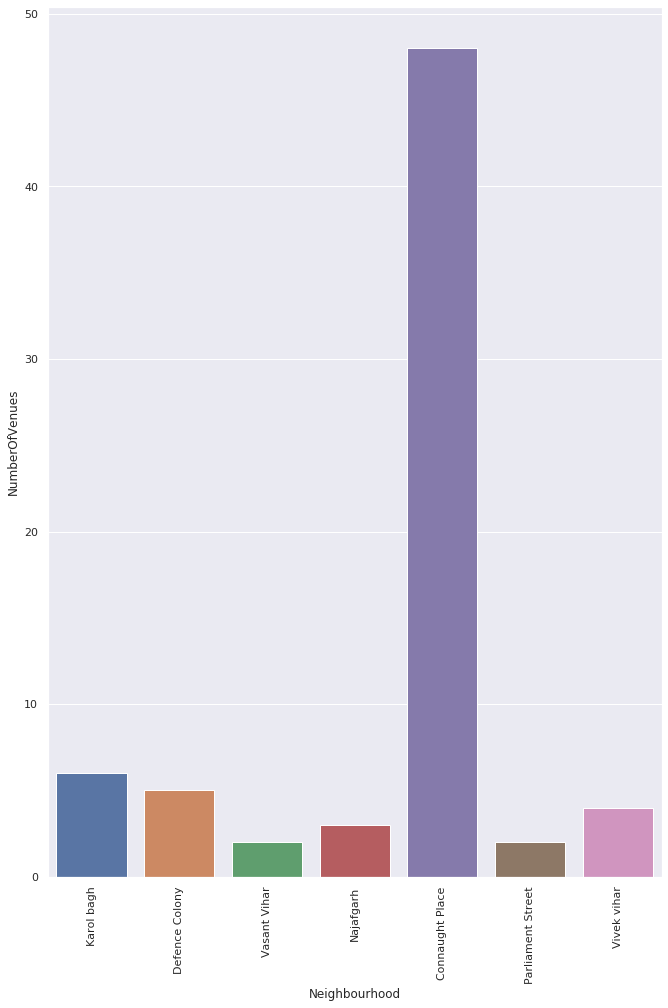

In [156]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighbourhood',y='NumberOfVenues',data=individual_delhi_venue_count)
plot.set_xticklabels(individual_delhi_venue_count['Neighbourhood'],rotation=90)

In [157]:
delhi_venues[delhi_venues['Neighbourhood']=='Karol bagh']


,Neighbourhood,Borough,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
57,Karol bagh,East Delhi,28.7184,77.1724,My Idea Store,28.717487,77.170922,Mobile Phone Shop
58,Karol bagh,East Delhi,28.7184,77.1724,Giani's,28.717900,77.173907,Ice Cream Shop
59,Karol bagh,East Delhi,28.7184,77.1724,Adarsh Nagar Metro Station,28.716598,77.170436,Light Rail Station
60,Karol bagh,East Delhi,28.7184,77.1724,Vishyavidyalaya Metro Station@Entry gate #1 n ...,28.715596,77.170981,Train Station
61,Karol bagh,East Delhi,28.7184,77.1724,Pahalwan Dhaba,28.714594,77.172155,Indian Restaurant
62,Karol bagh,East Delhi,28.7184,77.1724,K.C Food Zone,28.718279,77.176971,Snack Place


In [158]:
delhi_venues_onehot = pd.get_dummies(delhi_venues[['Venue Category']])


In [160]:
delhi_venues_onehot


,Venue Category_ATM,Venue Category_American Restaurant,Venue Category_Art Gallery,Venue Category_Asian Restaurant,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bar,Venue Category_Business Service,Venue Category_Café,Venue Category_Chinese Restaurant,...,Venue Category_Scandinavian Restaurant,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Tapas Restaurant,Venue Category_Tea Room,Venue Category_Tibetan Restaurant,Venue Category_Train Station,Venue Category_Turkish Restaurant,Venue Category_Women's Store
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
delhi_venues_onehot['Neighbourhood'] = delhi_venues['Neighbourhood']
delhi_venues_grouped = delhi_venues_onehot.groupby('Neighbourhood').mean().reset_index()
delhi_venues_grouped

,Neighbourhood,Venue Category_ATM,Venue Category_American Restaurant,Venue Category_Art Gallery,Venue Category_Asian Restaurant,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bar,Venue Category_Business Service,Venue Category_Café,...,Venue Category_Scandinavian Restaurant,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Tapas Restaurant,Venue Category_Tea Room,Venue Category_Tibetan Restaurant,Venue Category_Train Station,Venue Category_Turkish Restaurant,Venue Category_Women's Store
0,Connaught Place,0.00,0.041667,0.041667,0.020833,0.020833,0.041667,0.0625,0.00,0.104167,...,0.020833,0.0,0.000000,0.020833,0.020833,0.020833,0.020833,0.000000,0.020833,0.020833
1,Defence Colony,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,...,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Karol bagh,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,...,0.000000,0.0,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
3,Najafgarh,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.333333,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Parliament Street,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Vasant Vihar,0.50,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Vivek vihar,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.25,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [162]:
number_of_top_venues = 5


In [163]:

for hood in delhi_venues_grouped['Neighbourhood']:
    print('---------',hood,'---------')
    temp = delhi_venues_grouped[delhi_venues_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Connaught Place ---------
                                     Venue  Frequency
0         Venue Category_Indian Restaurant       0.10
1                Venue Category_Restaurant       0.10
2                      Venue Category_Café       0.10
3                       Venue Category_Bar       0.06
4  Venue Category_Mediterranean Restaurant       0.06


--------- Defence Colony ---------
                               Venue  Frequency
0          Venue Category_Smoke Shop        0.2
1  Venue Category_Chinese Restaurant        0.2
2   Venue Category_Indian Restaurant        0.2
3               Venue Category_Hotel        0.2
4  Venue Category_Light Rail Station        0.2


--------- Karol bagh ---------
                              Venue  Frequency
0  Venue Category_Indian Restaurant       0.17
1      Venue Category_Train Station       0.17
2     Venue Category_Ice Cream Shop       0.17
3  Venue Category_Mobile Phone Shop       0.17
4        Venue Category_Snack Place       0.17


In [164]:

def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [165]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = delhi_venues_grouped['Neighbourhood']

for ind in np.arange(delhi_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,Venue Category_Coffee Shop,Venue Category_American Restaurant
1,Defence Colony,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Hotel,Venue Category_Light Rail Station,Venue Category_Smoke Shop,Venue Category_Historic Site,Venue Category_Fried Chicken Joint,Venue Category_Dessert Shop,Venue Category_Convenience Store,Venue Category_Coffee Shop
2,Karol bagh,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Light Rail Station,Venue Category_Mobile Phone Shop,Venue Category_Ice Cream Shop,Venue Category_Train Station,Venue Category_Asian Restaurant,Venue Category_Bagel Shop,Venue Category_Art Gallery,Venue Category_Bakery
3,Najafgarh,Venue Category_Indian Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Café,Venue Category_Art Gallery,Venue Category_Asian Restaurant,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bar,Venue Category_Business Service,Venue Category_Turkish Restaurant
4,Parliament Street,Venue Category_Convenience Store,Venue Category_Plaza,Venue Category_Women's Store,Venue Category_Chinese Restaurant,Venue Category_Hotel,Venue Category_Historic Site,Venue Category_Fried Chicken Joint,Venue Category_Dessert Shop,Venue Category_Coffee Shop,Venue Category_Café


In [166]:

neighborhoods_venues_sorted.shape

(7, 11)

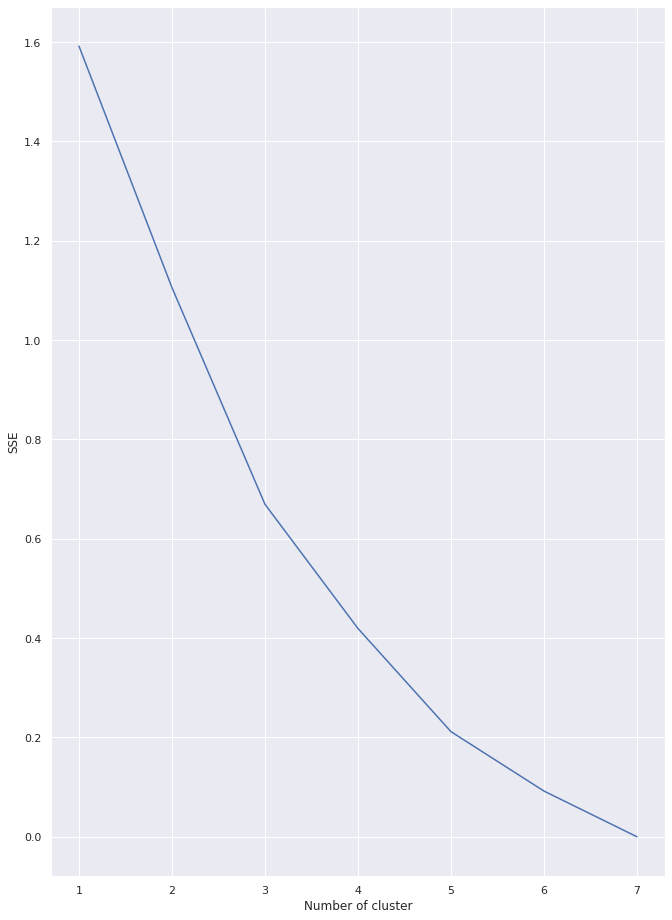

In [167]:
sse = {}
for k in range(1,8):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(delhi_venues_grouped.drop('Neighbourhood',axis=1))
    delhi_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

From the above graph, the optimal value for cluster is 1


In [169]:
kmeans = KMeans(n_clusters=1,random_state=0)


In [170]:
kmeans.fit(delhi_venues_grouped.drop('Neighbourhood',axis=1))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [171]:
delhi_venues_grouped['Cluster'] = kmeans.labels_

In [172]:
delhi_venues_grouped.groupby('Cluster')['Neighbourhood'].count()


Cluster
0    7
Name: Neighbourhood, dtype: int64

In [173]:
delhi_venues_grouped.columns

Index(['Neighbourhood', 'Venue Category_ATM',
       'Venue Category_American Restaurant', 'Venue Category_Art Gallery',
       'Venue Category_Asian Restaurant', 'Venue Category_Bagel Shop',
       'Venue Category_Bakery', 'Venue Category_Bar',
       'Venue Category_Business Service', 'Venue Category_Café',
       'Venue Category_Chinese Restaurant', 'Venue Category_Coffee Shop',
       'Venue Category_Convenience Store', 'Venue Category_Dessert Shop',
       'Venue Category_Fried Chicken Joint', 'Venue Category_Historic Site',
       'Venue Category_Hotel', 'Venue Category_IT Services',
       'Venue Category_Ice Cream Shop', 'Venue Category_Indian Restaurant',
       'Venue Category_Italian Restaurant',
       'Venue Category_Light Rail Station', 'Venue Category_Lounge',
       'Venue Category_Market', 'Venue Category_Mediterranean Restaurant',
       'Venue Category_Mobile Phone Shop', 'Venue Category_Park',
       'Venue Category_Plaza', 'Venue Category_Restaurant',
       'Venue

In [174]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(delhi_venues_grouped,on='Neighbourhood')

In [175]:
neighborhoods_venues_sorted.head(4)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Tapas Restaurant,Venue Category_Tea Room,Venue Category_Tibetan Restaurant,Venue Category_Train Station,Venue Category_Turkish Restaurant,Venue Category_Women's Store,Cluster
0,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,Venue Category_Coffee Shop,...,0.0,0.000000,0.020833,0.020833,0.020833,0.020833,0.000000,0.020833,0.020833,0
1,Defence Colony,Venue Category_Indian Restaurant,Venue Category_Chinese Restaurant,Venue Category_Hotel,Venue Category_Light Rail Station,Venue Category_Smoke Shop,Venue Category_Historic Site,Venue Category_Fried Chicken Joint,Venue Category_Dessert Shop,Venue Category_Convenience Store,...,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,Karol bagh,Venue Category_Indian Restaurant,Venue Category_Snack Place,Venue Category_Light Rail Station,Venue Category_Mobile Phone Shop,Venue Category_Ice Cream Shop,Venue Category_Train Station,Venue Category_Asian Restaurant,Venue Category_Bagel Shop,Venue Category_Art Gallery,...,0.0,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0
3,Najafgarh,Venue Category_Indian Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Café,Venue Category_Art Gallery,Venue Category_Asian Restaurant,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bar,Venue Category_Business Service,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [176]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(delhi_venues,on='Neighbourhood')

In [177]:
map_clusters = folium.Map(location=[delhi_latitude, bangalore_longitude], zoom_start=11)


In [178]:
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighbourhood Latitude'], neighborhoods_venues_sorted['Neighbourhood Longitude'], neighborhoods_venues_sorted['Neighbourhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [179]:
map_clusters

In [180]:
delhi_population.head()

,Borough,Neighbourhood,Population
0,North west,Najafgarh,3656539
1,South West,Parliament Street,2292958
2,South Delhi,Connaught Place,2731929
3,West Delhi,Vivek vihar,2543243
4,East Delhi,Karol bagh,1709346


In [181]:
delhi_population['Normalized_population'] = delhi_population['Population']/delhi_population['Population'].max(axis=0)

In [182]:
delhi_population.head()


,Borough,Neighbourhood,Population,Normalized_population
0,North west,Najafgarh,3656539,1.000000
1,South West,Parliament Street,2292958,0.627084
2,South Delhi,Connaught Place,2731929,0.747135
3,West Delhi,Vivek vihar,2543243,0.695533
4,East Delhi,Karol bagh,1709346,0.467476


In [218]:
delhi_venues_grouped.head(1)

,Neighbourhood,Venue Category_ATM,Venue Category_American Restaurant,Venue Category_Art Gallery,Venue Category_Asian Restaurant,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bar,Venue Category_Business Service,Venue Category_Café,...,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Tapas Restaurant,Venue Category_Tea Room,Venue Category_Tibetan Restaurant,Venue Category_Train Station,Venue Category_Turkish Restaurant,Venue Category_Women's Store,Cluster
0,Connaught Place,0.0,0.041667,0.041667,0.020833,0.020833,0.041667,0.0625,0.0,0.104167,...,0.0,0.0,0.020833,0.020833,0.020833,0.020833,0.0,0.020833,0.020833,0


In [219]:
delhi_veg = delhi_venues_onehot.groupby(['Neighbourhood']).sum().reset_index()
delhi_veg.head()

,Neighbourhood,Venue Category_ATM,Venue Category_American Restaurant,Venue Category_Art Gallery,Venue Category_Asian Restaurant,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bar,Venue Category_Business Service,Venue Category_Café,...,Venue Category_Scandinavian Restaurant,Venue Category_Smoke Shop,Venue Category_Snack Place,Venue Category_South Indian Restaurant,Venue Category_Tapas Restaurant,Venue Category_Tea Room,Venue Category_Tibetan Restaurant,Venue Category_Train Station,Venue Category_Turkish Restaurant,Venue Category_Women's Store
0,Connaught Place,0,2,2,1,1,2,3,0,5,...,1,0,0,1,1,1,1,0,1,1
1,Defence Colony,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Karol bagh,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,Najafgarh,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Parliament Street,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
delhi_veg['Venue Category_Asian Restaurant']

0    1
1    0
2    0
3    0
4    0
5    0
6    0
Name: Venue Category_Asian Restaurant, dtype: uint8

In [221]:
delhi_veg = delhi_veg[['Neighbourhood','Venue Category_Asian Restaurant']]


In [225]:
delhi_veg.head()

,Neighbourhood,NumberOfVegRestaurants
0,Connaught Place,1
1,Defence Colony,0
2,Karol bagh,0
3,Najafgarh,0
4,Parliament Street,0


In [223]:
bangalore_veg.head()


NameError: name 'bangalore_veg' is not defined

In [226]:
delhi_veg['NumberOfNonVeganrestaurants'] = 1-(delhi_veg['NumberOfVegRestaurants']/delhi_veg['NumberOfVegRestaurants'].max(axis=0))

In [228]:
delhi_veg.head(10)


,Neighbourhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Connaught Place,1,0.0
1,Defence Colony,0,1.0
2,Karol bagh,0,1.0
3,Najafgarh,0,1.0
4,Parliament Street,0,1.0
5,Vasant Vihar,0,1.0
6,Vivek vihar,0,1.0


In [229]:
delhi_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)


In [236]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighbourhood']=='Connaught Place']


In [237]:
target_cluster_dataframe.reset_index()


,index,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Turkish Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Kunzum Travel Cafe,28.553684,77.194368,Art Gallery
1,1,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Hauz Khas Village,28.554311,77.195140,Market
2,2,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,The Golconda Bowl,28.554972,77.194147,Indian Restaurant
3,3,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Social Offline,28.554461,77.193881,Lounge
4,4,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Imperfecto,28.554657,77.195092,Mediterranean Restaurant
5,5,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Naivedyam,28.554987,77.195104,South Indian Restaurant
6,6,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Chaayos,28.554247,77.194533,Tea Room
7,7,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Coast Cafe,28.554779,77.195214,Café
8,8,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Yeti - The Himalayan Kitchen,28.553656,77.194261,Tibetan Restaurant
9,9,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Fork You,28.553997,77.194455,American Restaurant


In [238]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']


In [239]:
target_cluster


0

In [240]:
print("The target cluster is : ",target_cluster)


The target cluster is :  0


In [241]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Turkish Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,Venue Category_Coffee Shop,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Kunzum Travel Cafe,28.553684,77.194368,Art Gallery
1,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,Venue Category_Coffee Shop,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Hauz Khas Village,28.554311,77.195140,Market
2,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,Venue Category_Coffee Shop,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,The Golconda Bowl,28.554972,77.194147,Indian Restaurant
3,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,Venue Category_Coffee Shop,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Social Offline,28.554461,77.193881,Lounge
4,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,Venue Category_Coffee Shop,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Imperfecto,28.554657,77.195092,Mediterranean Restaurant


In [243]:
print("There are {} neighborhoods which has similar characteristics to Connaught place.".format(possible_neighborhoods.shape[0]))

There are 70 neighborhoods which has similar characteristics to Connaught place.


In [244]:
possible_neighborhoods.reset_index().head()


,index,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Turkish Restaurant,Venue Category_Women's Store,Cluster,Borough,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Kunzum Travel Cafe,28.553684,77.194368,Art Gallery
1,1,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Hauz Khas Village,28.554311,77.195140,Market
2,2,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,The Golconda Bowl,28.554972,77.194147,Indian Restaurant
3,3,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Social Offline,28.554461,77.193881,Lounge
4,4,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0.020833,0.020833,0,South Delhi,28.5549,77.1919,Imperfecto,28.554657,77.195092,Mediterranean Restaurant


In [267]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)


In [278]:
top3_df = pd.DataFrame(possible_neighborhoods).reset_index()


In [279]:
top3_df.head(3)


,index,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Cluster,Borough,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population
0,0,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0,South Delhi,28.5549,77.1919,Kunzum Travel Cafe,28.553684,77.194368,Art Gallery,2731929,0.747135
1,1,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0,South Delhi,28.5549,77.1919,Hauz Khas Village,28.554311,77.195140,Market,2731929,0.747135
2,2,Connaught Place,Venue Category_Indian Restaurant,Venue Category_Restaurant,Venue Category_Café,Venue Category_Bar,Venue Category_Italian Restaurant,Venue Category_Mediterranean Restaurant,Venue Category_Art Gallery,Venue Category_Bakery,...,0,South Delhi,28.5549,77.1919,The Golconda Bowl,28.554972,77.194147,Indian Restaurant,2731929,0.747135


According to our analysis Connaught Place is best suited for Indian Restaurants.